#Installs

In [ ]:
!pip install convertbng

     |████████████████████████████████| 14.0MB 315kB/s 


# Imports

In [ ]:
# built-in modules
import re
import io
import requests
import warnings

# numpy and pandas
import pandas as pd
import numpy as np

# helper module for pandas to be able to process excel spreadsheets - xlrd is obsolete
import openpyxl

# matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams

# widgets
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

#plotly modules
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Settings

In [ ]:
# changing default figure size and style for matplotlib
rcParams["figure.figsize"] = 20, 10
mpl.style.use('ggplot')
warnings.filterwarnings('ignore')

# Data acquisition

In [ ]:
lfb_data_url = "https://data.london.gov.uk/download/london-fire-brigade-incident-records/b8f76a50-c7a0-4ff4-b3e4-7a42c5d0e8e3/LFB%20Incident%20data%20from%20January%202017.xlsx"


In [ ]:
faking_browser = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0'}
response = requests.get(lfb_data_url, headers = faking_browser )
if(response.ok):
  print("Data has been retrieved.")
  bytes_data = response.content
  buffer = io.BytesIO(bytes_data)
  have_a_look_at_excel = pd.ExcelFile(buffer)
else:
  print("Eh-raw")

Data has been retrieved.


In [ ]:
%whos

Variable               Type             Data/Info
-------------------------------------------------
HBox                   MetaHasTraits    <class 'ipywidgets.widgets.widget_box.HBox'>
VBox                   MetaHasTraits    <class 'ipywidgets.widgets.widget_box.VBox'>
buffer                 BytesIO          <_io.BytesIO object at 0x7fb422b07530>
bytes_data             bytes            b'PK\x03\x04\x14\x00\x06\<...>x00\x00r\xdf\x05\x00\x00'
display                function         <function display at 0x7fb444c17cb0>
faking_browser         dict             n=1
go                     module           <module 'plotly.graph_obj<...>plotly/graph_objects.py'>
have_a_look_at_excel   ExcelFile        <pandas.io.excel._base.Ex<...>object at 0x7fb422b11c50>
io                     module           <module 'io' from '/usr/lib/python3.7/io.py'>
lfb_data_url           str              https://data.london.gov.u<...>rom%20January%202017.xlsx
make_subplots          function         <function make_subpl


# Scratching the surface - meta analysis
Data types, null values, column statistics.

In [ ]:
have_a_look_at_excel.sheet_names

['Sheet1']

In [ ]:
df = pd.read_excel(have_a_look_at_excel)
df.head(3)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,000298-01012017,2017-01-01,2017,14:17:24,14,False Alarm,False alarm - Good intent,NaN,Non Residential,Restaurant/cafe,Correct incident location,E4 7QH,E4,10091774658,22869100,E09000031,WALTHAM FOREST,Waltham Forest,E05000593,CHINGFORD GREEN,CHINGFORD GREEN,539649.0,194764.0,539650,194750,51.634359,0.016468,London,Chingford,159.0,Chingford,296.0,Woodford,2.0,2.0,2.0,1.0,326.0
1,000051-01012017,2017-01-01,2017,00:50:06,0,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street outside gazetteer location,E6 3EU,E6,46079106,22201202,E09000025,NEWHAM,Newham,E05000476,BOLEYN,BOLEYN,541703.0,182755.0,541750,182750,51.525937,0.041286,London,East Ham,262.0,Plaistow,NaN,NaN,1.0,1.0,1.0,1.0,326.0
2,000429-01012017,2017-01-01,2017,21:00:49,21,False Alarm,AFA,NaN,Non Residential,Pub/wine bar/bar,Correct incident location,SE15 4HY,SE15,200003394409,22501092,E09000028,SOUTHWARK,Southwark,E05011103,Goose Green,Goose Green,534131.0,175641.0,534150,175650,51.463855,-0.070499,London,Peckham,314.0,Peckham,NaN,NaN,1.0,1.0,1.0,1.0,326.0


In [ ]:
df.shape

(420243, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420243 entries, 0 to 420242
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          420243 non-null  object        
 1   DateOfCall                              420243 non-null  datetime64[ns]
 2   CalYear                                 420243 non-null  int64         
 3   TimeOfCall                              420243 non-null  object        
 4   HourOfCall                              420243 non-null  int64         
 5   IncidentGroup                           420243 non-null  object        
 6   StopCodeDescription                     420243 non-null  object        
 7   SpecialServiceType                      131799 non-null  object        
 8   PropertyCategory                        420243 non-null  object        
 9   PropertyType                         

In [ ]:
df.dtypes

IncidentNumber                                    object
DateOfCall                                datetime64[ns]
CalYear                                            int64
TimeOfCall                                        object
HourOfCall                                         int64
IncidentGroup                                     object
StopCodeDescription                               object
SpecialServiceType                                object
PropertyCategory                                  object
PropertyType                                      object
AddressQualifier                                  object
Postcode_full                                     object
Postcode_district                                 object
UPRN                                               int64
USRN                                               int64
IncGeo_BoroughCode                                object
IncGeo_BoroughName                                object
ProperCase                     

In [ ]:
df.isna().sum()

IncidentNumber                                 0
DateOfCall                                     0
CalYear                                        0
TimeOfCall                                     0
HourOfCall                                     0
IncidentGroup                                  0
StopCodeDescription                            0
SpecialServiceType                        288444
PropertyCategory                               0
PropertyType                                   0
AddressQualifier                               0
Postcode_full                             213501
Postcode_district                              0
UPRN                                           0
USRN                                           0
IncGeo_BoroughCode                             0
IncGeo_BoroughName                             0
ProperCase                                     0
IncGeo_WardCode                                0
IncGeo_WardName                                0
IncGeo_WardNameNew  

In [ ]:
df.describe()

,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
count,420243.000000,420243.000000,4.202430e+05,4.202430e+05,206742.000000,206742.000000,420243.000000,420243.000000,206742.000000,206742.000000,396059.000000,160962.000000,417989.000000,417989.000000,418405.000000,418280.000000,418280.000000
mean,2018.523906,13.469257,2.287758e+10,2.035041e+07,530644.419397,180399.331597,530670.990950,180522.519709,51.446808,-0.118710,310.205111,388.037332,1.383838,1.566948,1.620834,1.373597,460.732055
std,1.146158,6.247467,4.793035e+10,4.801780e+06,10344.461021,7484.717039,9733.341425,7395.221092,1.766109,0.149110,131.824625,147.289737,0.721471,0.874773,1.652881,6.886935,2294.186846
min,2017.000000,0.000000,0.000000e+00,4.200740e+06,503582.000000,155998.000000,503550.000000,155950.000000,0.000000,-0.510155,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,326.000000
25%,2018.000000,9.000000,0.000000e+00,2.040087e+07,525045.000000,175882.000000,525150.000000,176150.000000,51.467583,-0.199554,228.000000,294.000000,1.000000,1.000000,1.000000,1.000000,328.000000
50%,2019.000000,14.000000,0.000000e+00,2.120103e+07,530812.500000,181004.000000,530950.000000,181050.000000,51.513058,-0.116925,292.000000,363.000000,1.000000,1.000000,1.000000,1.000000,339.000000
75%,2020.000000,19.000000,1.002535e+10,2.210052e+07,536958.000000,185072.000000,536350.000000,185250.000000,51.549157,-0.026776,369.000000,452.000000,2.000000,2.000000,2.000000,1.000000,346.000000
max,2021.000000,23.000000,2.000044e+11,9.999042e+07,560251.000000,200899.000000,560250.000000,200850.000000,51.691568,0.310609,1200.000000,1200.000000,11.000000,14.000000,319.000000,2163.000000,709464.000000


In [ ]:
df.columns

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpHoursRoundUp', 'Notional Cost (£)'],
      dtype='object')

## Adding a few extra columns
Extracting day of week, month, year and week of month and year data

In [ ]:
months = "Jan,Feb,March,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec".split(",")
df['Month'] = df.DateOfCall.dt.month
df['MonthStr'] = df['Month'].apply(lambda d: months[d-1])
df['DayOfWeek'] = df.DateOfCall.dt.dayofweek
df['DayOfWeekStr'] = df.DateOfCall.dt.day_name()

df['DayOfMonth'] = df.DateOfCall.dt.day
df['DayOfYear'] = df.DateOfCall.dt.dayofyear
df['WeekOfMonth'] = df.DayOfMonth.apply(lambda d: (d - 1) // 7 + 1)
df['WeekOfYear'] = df.DateOfCall.dt.week

# Introducing a bit of interactivity
To facilitate analysis, I am adding a few dropdown widgets

### Declaring functions

In [ ]:
## function to create the dropdowns
def throwaway_function_for_filter_elements():
  list_of_boroughs = df["ProperCase"].unique().tolist()
  list_of_years = df["CalYear"].unique().tolist()
  list_of_incidents = df["IncidentGroup"].unique().tolist()

  list_of_boroughs.insert(0, ".*")
  list_of_years.insert(0, ".*")
  list_of_incidents.insert(0, ".*")

  year_selector = widgets.Dropdown(
      description = "Year: ",
      value = 2020,
      options = [(i,i) for i in list_of_years]
  )


  borough_selector = widgets.Dropdown(
      description = "Borough: ",
      value = "Kingston Upon thames",
      options = [(i,i) for i in list_of_boroughs]
  )
  type_selector = widgets.Dropdown(
      description = "Type: ",
      value = "Fire",
      options = [(i,i) for i in list_of_incidents]
  )
  hbox = HBox([year_selector, borough_selector,type_selector ])
  def f():
    return hbox
  return f
get_filter_elements = throwaway_function_for_filter_elements()


In [ ]:
# function to handle the dropdowns
def get_filtered_dataframe():
  return df[(df["CalYear"].map(str).str.match(re.compile(str(get_filter_elements().children[0].value)), re.IGNORECASE)) &
                 (df["ProperCase"].str.match(re.compile(get_filter_elements().children[1].value), re.IGNORECASE)) &
                 (df["IncidentGroup"].map(str).str.match(re.compile(get_filter_elements().children[2].value, re.IGNORECASE)))]

# Column value count statistics - barcharts

## Displaying dropdowns

In [ ]:
# Should you wish to update your df filtering, just call this function
get_filter_elements()

In [ ]:
# Then the next function to get your filtered data
df_filtered = get_filtered_dataframe()
df_filtered.head(3)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),Month,MonthStr,DayOfWeek,DayOfWeekStr,DayOfMonth,DayOfYear,WeekOfMonth,WeekOfYear
314758,000162-01012020,2020-01-01,2020,03:51:20,3,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,On land associated with building,NaN,KT5,0,21800789,E09000021,KINGSTON UPON THAMES,Kingston Upon thames,E05000400,ALEXANDRA,ALEXANDRA,NaN,NaN,519650,166650,NaN,NaN,London,Surbiton,285.0,Surbiton,429.0,New Malden,2.0,2.0,2.0,4.0,1356.0,1,Jan,2,Wednesday,1,1,1,1
314907,000635-02012020,2020-01-02,2020,10:13:22,10,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,On land associated with building,NaN,KT6,0,21800482,E09000021,KINGSTON UPON THAMES,Kingston Upon thames,E05000414,TOLWORTH AND HOOK RISE,TOLWORTH AND HOOK RISE,NaN,NaN,519550,165850,NaN,NaN,London,Surbiton,334.0,Surbiton,556.0,Kingston,2.0,2.0,2.0,2.0,678.0,1,Jan,3,Thursday,2,2,1,1
315001,000855-02012020,2020-01-02,2020,21:07:03,21,Fire,Primary Fire,NaN,Non Residential,Restaurant/cafe,Correct incident location,KT1 1SU,KT1,128022940,21800405,E09000021,KINGSTON UPON THAMES,Kingston Upon thames,E05000408,GROVE,GROVE,518183.0,169453.0,518150,169450,51.411791,-0.302028,London,Kingston,311.0,Kingston,351.0,Surbiton,2.0,2.0,2.0,4.0,1356.0,1,Jan,3,Thursday,2,2,1,1


## Barcharts: Visualising data statistics I.

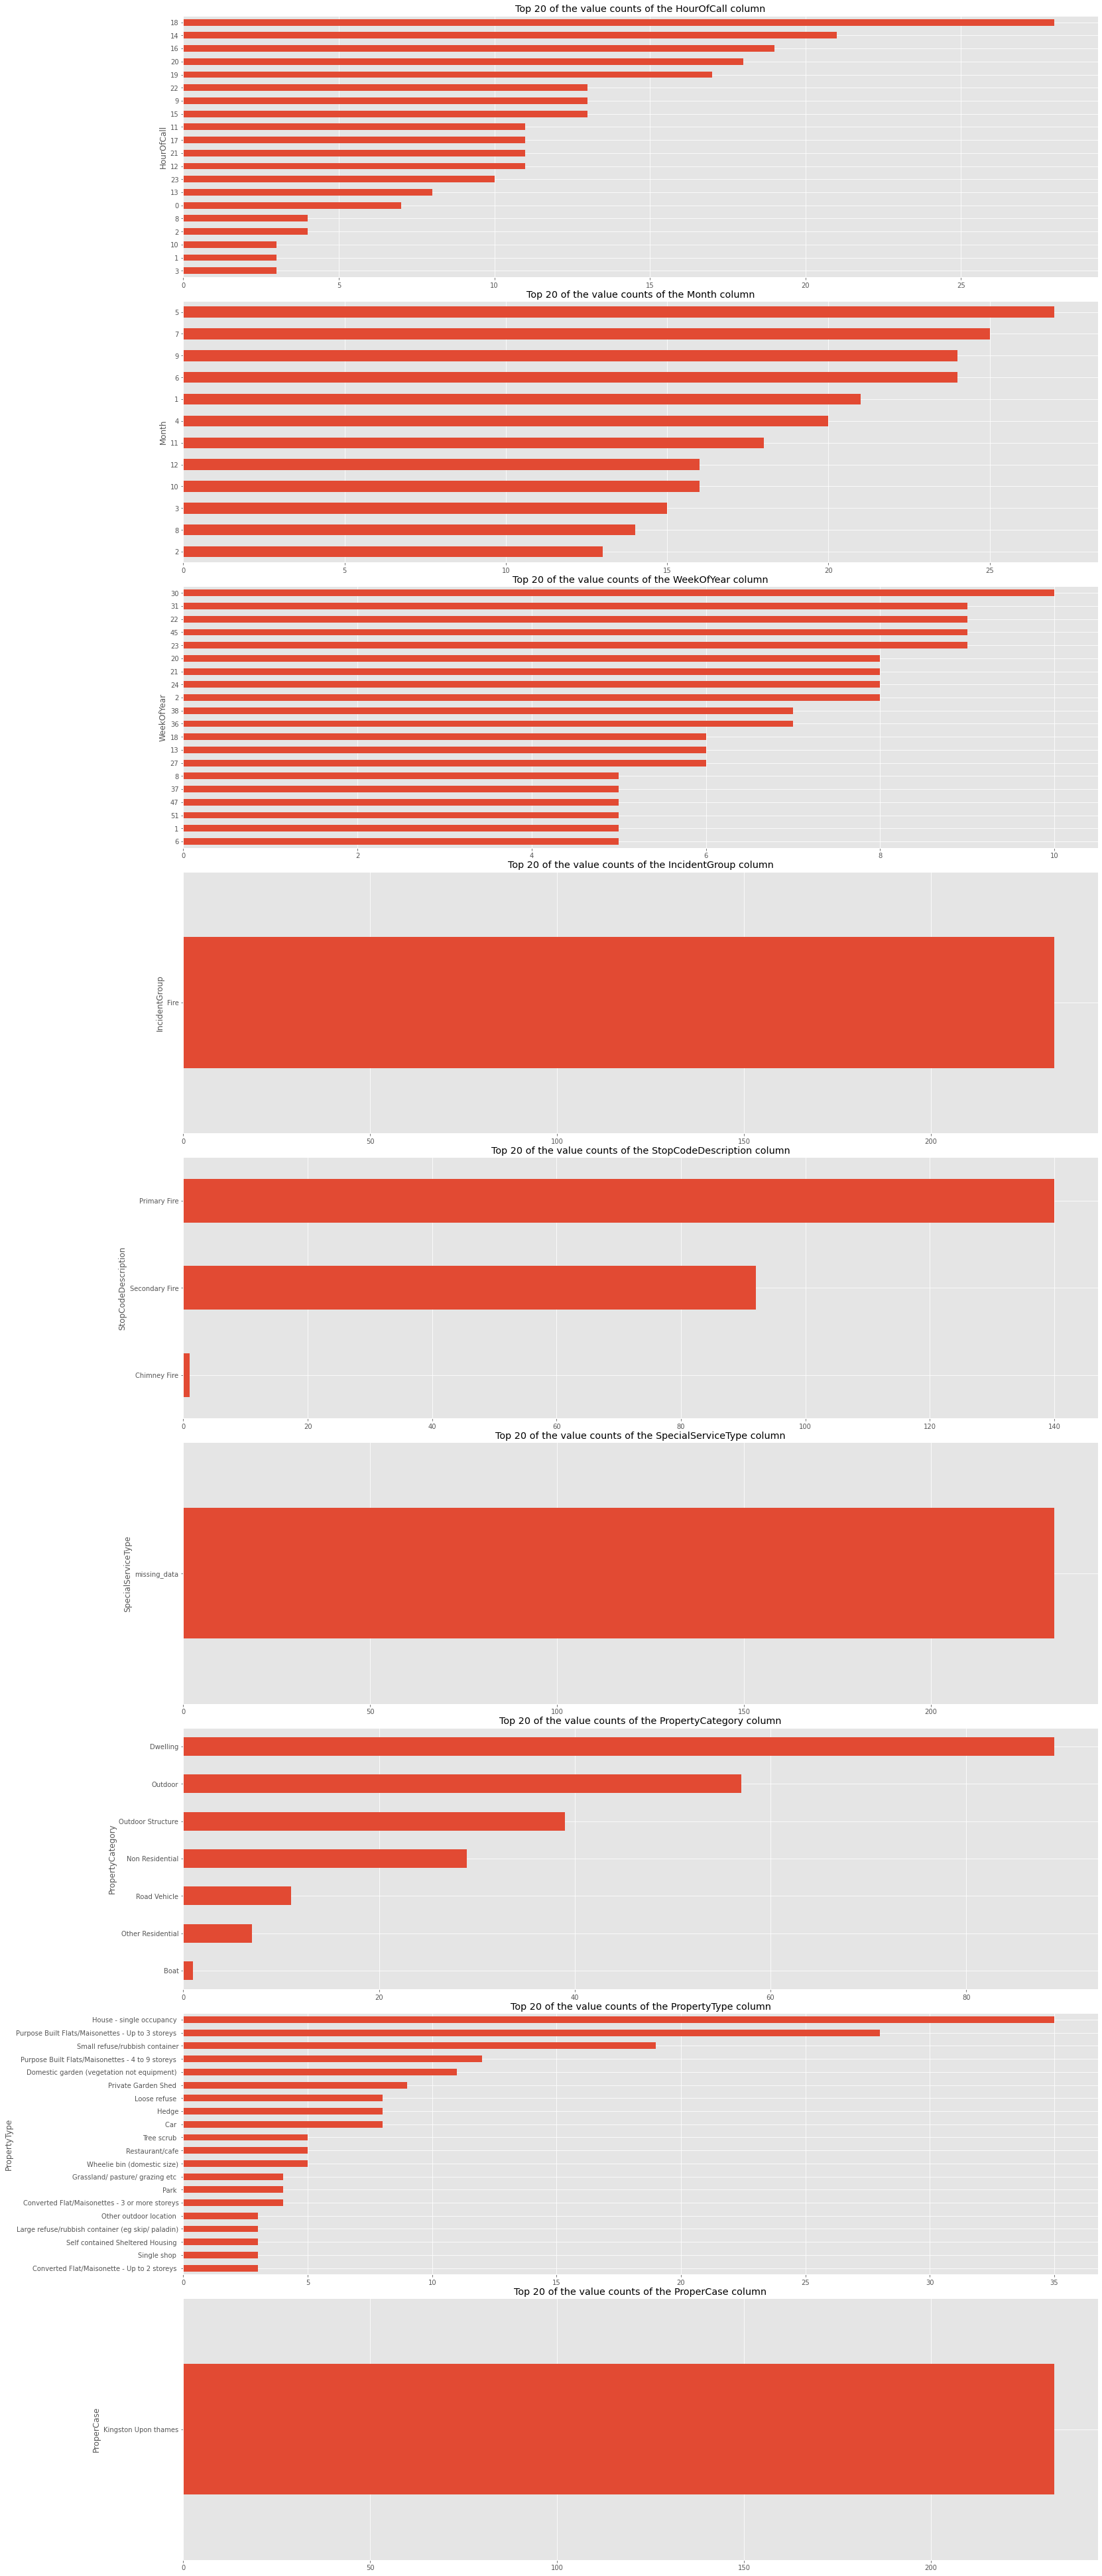

In [ ]:
columns_to_plot = "HourOfCall,Month,WeekOfYear,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,ProperCase".split(",")
fig, axes = plt.subplots(len(columns_to_plot), 1)
fig.set_figheight(int(len(axes)*6))
fig.tight_layout(pad = 1.5)
for i, feature in enumerate(columns_to_plot):
  try:
    temp_df = df_filtered.fillna("missing_data")
    temp_df = pd.DataFrame(temp_df.groupby(by = feature).size()).reset_index().sort_values(by = 0, ascending = False).head(20).sort_values(by = 0, ascending = True)
    temp_df.plot(kind = "barh", x = feature, y = 0, ax = axes[i], label = feature)
    axes[i].set_yticklabels(temp_df.sort_values(by = 0)[feature])
    axes[i].set_ylabel(feature)
    axes[i].set_label(feature)
    axes[i].set_title("Top 20 of the value counts of the {} column".format(feature))
    axes[i].get_legend().remove()
  except Exception as e:
    print("Something went terrible wrong with the feature column {}. Better ask Gergo what he cocked up this time.".format(feature))
plt.show()

# Combined bar + linecharts with matplotlib: Yearly statistics

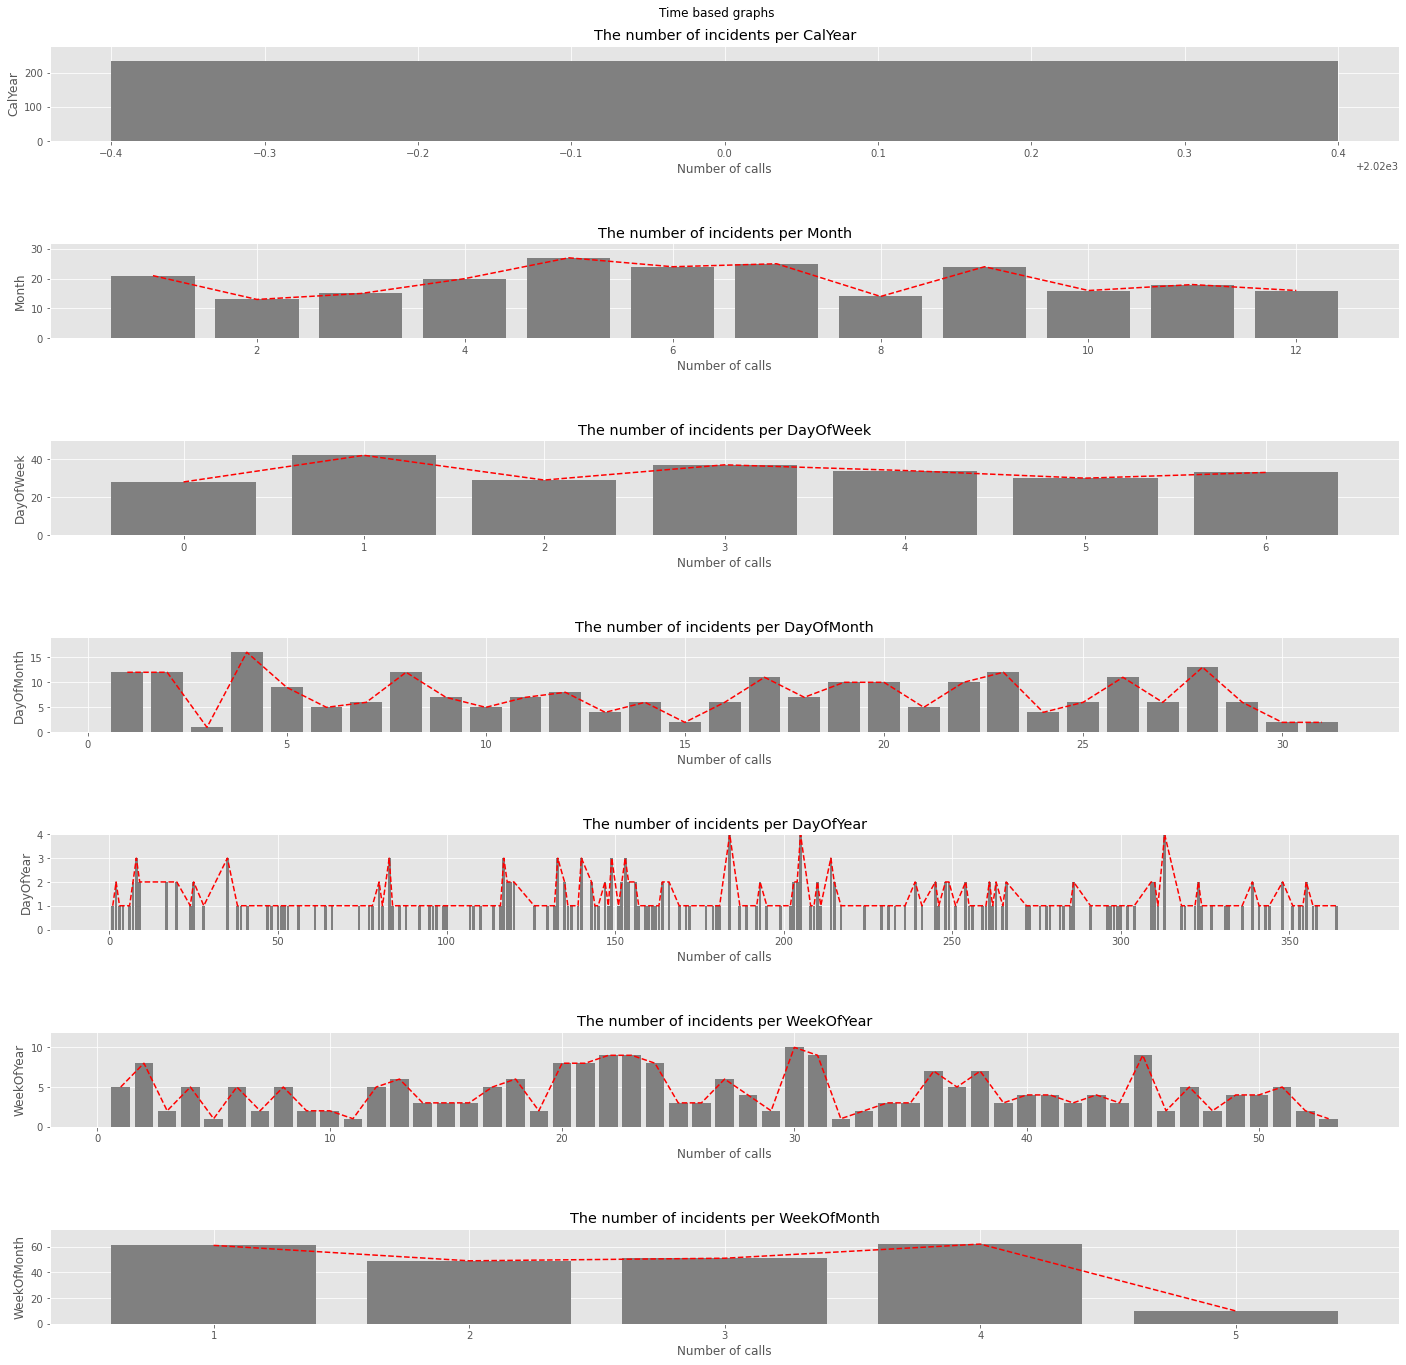

In [ ]:
aggregation_fields = ["CalYear", 'Month', 'DayOfWeek', 'DayOfMonth', 'DayOfYear', "WeekOfYear", 'WeekOfMonth']
fig, axes = plt.subplots(nrows = len(aggregation_fields))
fig.tight_layout(pad = 3)
fig.set_figheight(20)
for i, field in enumerate(aggregation_fields):
  temp_df = pd.DataFrame(df_filtered.groupby(by = field).size()).reset_index()
  temp_df.columns = [field, "count"]
  axes[i].bar(temp_df[field],  temp_df["count"], color = "gray")

  axes[i].plot(temp_df[field],  temp_df["count"], "--", color = "red")
  # pandas introduces a rendering error
  #temp_df.plot(kind = "bar", ax = axes[i], x = field, y="count", color = "gray")

  axes[i].set_ylabel(field)
  axes[i].set_xlabel("Number of calls")
  axes[i].set_title("The number of incidents per {}".format(field))
  axes[i].set_ylim(0, temp_df["count"].max() + int(temp_df["count"].max() * 0.2) )
plt.suptitle("Time based graphs")
plt.show()

# Bar + linecharts with plotly: Yearly statistics

## Daily graph

In [ ]:
fig = plotly.graph_objs.Figure()
date_aggregated = df_filtered.groupby(by = "DateOfCall").count().reset_index()
graph_obj = plotly.graph_objs.Scatter(x = date_aggregated["DateOfCall"], y = date_aggregated["IncidentNumber"], name = "N incidents")
fig.update_layout(title = {"text": "Number of Primary Fire incidents per day", "x" : 0.5})
fig.add_trace(graph_obj)
fig.show()

## Other time based graphs

In [ ]:
aggregation_fields = ["CalYear", 'Month', 'DayOfWeek', 'DayOfMonth', 'DayOfYear',  'WeekOfMonth', "WeekOfYear"]
fig = go.Figure()
fig = make_subplots(rows= len(aggregation_fields), vertical_spacing = 0.1)

for i, field in enumerate(aggregation_fields):
  temp_df = pd.DataFrame(df_filtered.groupby(by = field).size()).reset_index()
  temp_df.columns = [field, "count"]
  bar = go.Bar(x = temp_df[field], y = temp_df["count"], marker = {"color":"gray", "opacity": 0.5})
  line = go.Scatter(x = temp_df[field], y = temp_df["count"], name = field)
  fig.add_trace(bar, row = i+1, col = 1)
  fig.add_trace(line, row = i+1, col = 1)
fig.update_layout(title = {"text": "Time graphs", "x": 0.5}, showlegend = False)
for ax_num in range(len(aggregation_fields)):
  domain_end = 1 - ax_num * (1/len(aggregation_fields))
  domain_start = domain_end - 1/len(aggregation_fields) + 0.03
  fig.update_yaxes(domain = [domain_start, domain_end], row = ax_num + 1, col = 1)
  fig.update_xaxes(title = aggregation_fields[ax_num], side = "top", title_standoff = 0,  row = ax_num + 1, col = 1)

fig.update_layout(height = len(aggregation_fields)*400)

## Exploring yearly trends - plotly

In [ ]:
aggregation_fields = ['DayOfWeek', 'DayOfMonth',  'DayOfYear', 'WeekOfMonth', "WeekOfYear"]
fig = go.Figure()
fig = make_subplots(rows= len(aggregation_fields), 
                    #subplot_titles = aggregation_fields, 
                    vertical_spacing = 0.2,
                    row_heights = [0.2,0.2,0.2,0.2,0.2])
for ax_num in range(len(aggregation_fields)):
  domain_end = 1 -  (ax_num ) * 0.2
  domain_start = domain_end - 0.13
  fig.update_yaxes(domain = [domain_start, domain_end], row = ax_num + 1, col = 1, title = aggregation_fields[ax_num])
fig.update_layout(height = len(aggregation_fields)*400)

for i, field in enumerate(aggregation_fields):
  temp_df = pd.DataFrame(df_filtered.groupby(by = ["CalYear", field]).count()).reset_index()
  temp_df.index = "y"+temp_df["CalYear"].map(str) + "-w" + temp_df[field].map(str)
  temp_df = temp_df.sort_values(by = ["CalYear", field])

  bar = go.Bar(x = temp_df.index, y = temp_df["IncidentNumber"], marker = {"color":"gray", "opacity": 0.5})
  line = go.Scatter(x = temp_df.index, y = temp_df["IncidentNumber"], name = field)
  fig.add_trace(bar, row = i+1, col = 1)
  fig.add_trace(line, row = i+1, col = 1)
fig.update_layout(title = {"text": "Yearly trend graphs", "x" : 0.5}, showlegend = False)


In [ ]:
aggregation_fields = ['Month']
fig = go.Figure()
fig = make_subplots(rows= len(aggregation_fields), subplot_titles = aggregation_fields, vertical_spacing = 0.2)
for i, field in enumerate(aggregation_fields):
  temp_df = pd.DataFrame(df_filtered.groupby(by = ["CalYear", field]).count()).reset_index()
  temp_df.index = "y"+temp_df["CalYear"].map(str) + "-w" + temp_df[field].map(str)
  temp_df = temp_df.sort_values(by = ["CalYear", field])
  bar = go.Bar(x = temp_df.index, y = temp_df["IncidentNumber"], marker = {"color":"gray", "opacity": 0.5})
  line = go.Scatter(x = temp_df.index, y = temp_df["IncidentNumber"], name = field)
  fig.add_trace(bar, row = i+1, col = 1)
  fig.add_trace(line, row = i+1, col = 1)
fig.update_layout(title = "Time graphs", showlegend = False, autosize = False)
fig.update_layout(height = len(aggregation_fields)*400, width = 1200)

# Aggregation on two variables: user modified bubble plot

## Adding interactivity through dropdown filters

In [ ]:
def get_aggregation_fields_function(df):
  aggregation_fileds = df.columns.tolist()
  dd1 = widgets.Dropdown(
      value = "IncGeo_WardCode",
      options = [(n,n) for n in aggregation_fileds],
      description = "1st field:"
  )
  dd2 = widgets.Dropdown(
    value = "SpecialServiceType",
    options = [(n,n) for n in aggregation_fileds],
    description = "2nd field:"
  )
  container = HBox([dd1, dd2])
  def f():
    return container
  return f
get_aggregation_fields = get_aggregation_fields_function(df)
get_aggregation_fields()

## Initial grouping by selected fields

In [ ]:
wardwise_df = df.copy()
wardwise_df = wardwise_df.groupby(by = [get_aggregation_fields().children[0].value, get_aggregation_fields().children[1].value]).count().reset_index()
wardwise_df.head()

,IncGeo_WardCode,SpecialServiceType,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),Month,MonthStr,DayOfWeek,DayOfWeekStr,DayOfMonth,DayOfYear,WeekOfMonth,WeekOfYear
0,E05000026,Advice Only,6,6,6,6,6,6,6,6,6,6,2,6,6,6,6,6,6,6,6,2,2,6,6,2,2,6,6,4,4,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6
1,E05000026,Animal assistance incidents,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
2,E05000026,Assist other agencies,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,0,0,2,2,0,0,2,2,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2
3,E05000026,Effecting entry/exit,61,61,61,61,61,61,61,61,61,61,9,61,61,61,61,61,61,61,61,9,9,61,61,9,9,61,61,57,57,0,0,61,61,61,61,61,61,61,61,61,61,61,61,61
4,E05000026,Evacuation (no fire),4,4,4,4,4,4,4,4,4,4,1,4,4,4,4,4,4,4,4,1,1,4,4,1,1,4,4,4,4,1,1,4,4,4,4,4,4,4,4,4,4,4,4,4


## A glimpse into the unique values of both selected fields

In [ ]:
wardwise_df.shape

(10234, 46)

In [ ]:
wardwise_df[get_aggregation_fields().children[0].value].unique().shape

(673,)

In [ ]:
wardwise_df[get_aggregation_fields().children[1].value].unique()

array(['Advice Only', 'Animal assistance incidents',
       'Assist other agencies', 'Effecting entry/exit',
       'Evacuation (no fire)', 'Flooding', 'Hazardous Materials incident',
       'Lift Release', 'Making Safe (not RTC)', 'Medical Incident',
       'Medical Incident - Co-responder', 'No action (not false alarm)',
       'Other Transport incident', 'Other rescue/release of persons',
       'RTC', 'Spills and Leaks (not RTC)', 'Suicide/attempts',
       'Removal of objects from people', 'Stand By',
       'Rescue or evacuation from water', 'Water provision'], dtype=object)

In [ ]:
sum(wardwise_df.isna().sum() > 0)

0

## Adding "sum" and "max" columns to the aggregated df


In [ ]:
maxes_and_sums = wardwise_df[[get_aggregation_fields().children[0].value, "IncidentNumber"]].groupby(by=get_aggregation_fields().children[0].value)\
    .max().reset_index()\
    .rename(columns={"IncidentNumber": "maximum_incidents"})\
    .merge(
            wardwise_df[[get_aggregation_fields().children[0].value, "IncidentNumber"]].groupby(by=get_aggregation_fields().children[0].value)\
            .sum()\
            .reset_index()\
            .rename(columns={"IncidentNumber": "sum_of_incidents"}),
            how = "left",
            left_on = get_aggregation_fields().children[0].value,
            right_on = get_aggregation_fields().children[0].value)
maxes_and_sums.shape

(673, 3)

In [ ]:
maxes_and_sums.isna().sum()

IncGeo_WardCode      0
maximum_incidents    0
sum_of_incidents     0
dtype: int64

In [ ]:
wardwise_df_temp = wardwise_df[[get_aggregation_fields().children[0].value, get_aggregation_fields().children[1].value, "IncidentNumber"]].merge(
    maxes_and_sums,
    how = "inner", 
    left_on = [get_aggregation_fields().children[0].value, "IncidentNumber"] ,
     right_on=[get_aggregation_fields().children[0].value, "maximum_incidents"])
wardwise_df_temp.shape

(710, 5)

## If the row count is greater than the unique values for the first key, here is why

In [ ]:
wardwise_df_temp.head(3)

,IncGeo_WardCode,SpecialServiceType,IncidentNumber,maximum_incidents,sum_of_incidents
0,E05000026,Lift Release,69,69,308
1,E05000027,Effecting entry/exit,23,23,104
2,E05000027,RTC,23,23,104


In [ ]:
# How many duplicates
duplicated_wards = wardwise_df_temp[wardwise_df_temp[[get_aggregation_fields().children[0].value]].duplicated()]
duplicated_wards[get_aggregation_fields().children[0].value].unique().shape

(34,)

In [ ]:
# All the duplicates
wardwise_df_temp[wardwise_df_temp[get_aggregation_fields().children[0].value].isin(duplicated_wards[get_aggregation_fields().children[0].value].unique())]

,IncGeo_WardCode,SpecialServiceType,IncidentNumber,maximum_incidents,sum_of_incidents
1,E05000027,Effecting entry/exit,23,23,104
2,E05000027,RTC,23,23,104
38,E05000063,Flooding,36,36,187
39,E05000063,RTC,36,36,187
42,E05000077,Lift Release,1,1,2
...,...,...,...,...,...
687,E05011469,RTC,13,13,57
699,E05011481,Effecting entry/exit,17,17,83
700,E05011481,RTC,17,17,83
701,E05011482,Effecting entry/exit,36,36,135


## Visualising the results

In [ ]:
# just a backup in case you want to refilter
wardwise_df_bckup = wardwise_df_temp

In [ ]:
# Bounding the lower bound of incident counts for better visual results

wardwise_df_temp = wardwise_df_temp[wardwise_df_temp["maximum_incidents"] > 50]
to_be_color_coded = wardwise_df_temp[get_aggregation_fields().children[1].value].unique().tolist()

# Colour coding the types
colours =  ["rgb({}, {}, {})".format(*list(map(int, l[0:-1]*255))) for l in plt.cm.viridis(np.linspace(0, 1, len(to_be_color_coded)))]
wardwise_df_temp["color_id"] =  [colours[to_be_color_coded.index(sc)] for sc in wardwise_df_temp[get_aggregation_fields().children[1].value].values]
wardwise_df_temp[get_aggregation_fields().children[1].value].unique().shape

(5,)

In [ ]:
# building and displaying the figure
fig = go.Figure()
for key2 in wardwise_df_temp[get_aggregation_fields().children[1].value].unique():
  temp = wardwise_df_temp[wardwise_df_temp[get_aggregation_fields().children[1].value] == key2]
  myGo = go.Scatter(x = temp["sum_of_incidents"],
                  y = temp["maximum_incidents"], 
                  mode =  "markers",
                  name = key2,
                  marker = dict(
                      color =  temp["color_id"].values,
                      size = temp["maximum_incidents"]/5
                     
                  ),
                  hovertemplate = "%{text}",
                  text = ["{}: {}: {}/{}".format(a, b, c,d) for a,b,c,d in temp[[get_aggregation_fields().children[0].value,
                                                                                      get_aggregation_fields().children[1].value, 
                                                                                      "maximum_incidents",
                                                                                       "sum_of_incidents"]].values]
                      
                  )
  fig.add_trace(myGo)
fig.update_layout(
    title = {"text": "The most frequent {} per {}".format(get_aggregation_fields().children[1].value, get_aggregation_fields().children[0].value),
    "x": 0.5},
    yaxis = {"title": "All incidents"},
    xaxis = {"title": "Most frequent type count"},
    height = 800
)
fig.show()

# Maps

## Choropleth map

### Getting the filters first

In [ ]:
get_filter_elements()

In [ ]:
new_filtered_df = get_filtered_dataframe()
new_filtered_df.shape

(233, 46)

In [ ]:
new_filtered_df.head(3)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),Month,MonthStr,DayOfWeek,DayOfWeekStr,DayOfMonth,DayOfYear,WeekOfMonth,WeekOfYear
314758,000162-01012020,2020-01-01,2020,03:51:20,3,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,On land associated with building,NaN,KT5,0,21800789,E09000021,KINGSTON UPON THAMES,Kingston Upon thames,E05000400,ALEXANDRA,ALEXANDRA,NaN,NaN,519650,166650,NaN,NaN,London,Surbiton,285.0,Surbiton,429.0,New Malden,2.0,2.0,2.0,4.0,1356.0,1,Jan,2,Wednesday,1,1,1,1
314907,000635-02012020,2020-01-02,2020,10:13:22,10,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,On land associated with building,NaN,KT6,0,21800482,E09000021,KINGSTON UPON THAMES,Kingston Upon thames,E05000414,TOLWORTH AND HOOK RISE,TOLWORTH AND HOOK RISE,NaN,NaN,519550,165850,NaN,NaN,London,Surbiton,334.0,Surbiton,556.0,Kingston,2.0,2.0,2.0,2.0,678.0,1,Jan,3,Thursday,2,2,1,1
315001,000855-02012020,2020-01-02,2020,21:07:03,21,Fire,Primary Fire,NaN,Non Residential,Restaurant/cafe,Correct incident location,KT1 1SU,KT1,128022940,21800405,E09000021,KINGSTON UPON THAMES,Kingston Upon thames,E05000408,GROVE,GROVE,518183.0,169453.0,518150,169450,51.411791,-0.302028,London,Kingston,311.0,Kingston,351.0,Surbiton,2.0,2.0,2.0,4.0,1356.0,1,Jan,3,Thursday,2,2,1,1


### Getting GEO_JSON data

In [ ]:
ward_level_geo_json = "https://opendata.arcgis.com/datasets/62bfaabbe3e24a359fc36b34d7fe8ac8_0.geojson"
response = requests.get(ward_level_geo_json, headers = faking_browser )
if(response.ok):
  print("Data has been retrieved.")
  geo_json = response.json()
else: 
  print("Eh-raw")

Data has been retrieved.


### Getting our data ready
Before we get to visualise anything on a map, we need to consider the following:
1. No null values in the column we want to use as a value column as otherwise it will throw an error.
2. The fact that the downloaded Geo JSON is divided up into wards does not guarantee that those will match up with the ones in the Geo JSON. For two reasons: 
  - Our FSB dataset is of incidencts in London. Our Geo JSON is for the whole of UK.
  - There might have been a series of updates in Ward Coding. Simply, we don't know that the wards specified in either file exist in the other file.


In [ ]:
# Do we have null values in the WardCode column?
new_filtered_df["IncGeo_WardCode"].isna().sum()

0

In [ ]:
ward_codes_in_london = new_filtered_df["IncGeo_WardCode"].unique()
print("The number of unique wards in London: {}".format(ward_codes_in_london.shape[0]))

The number of unique wards in London: 16


### Let's find the feature column where the ward codes are!

In [ ]:
peek_into_json = pd.json_normalize(geo_json["features"])
peek_into_json.head(3)

,type,properties.objectid,properties.wd20cd,properties.wd20nm,properties.wd20nmw,properties.bng_e,properties.bng_n,properties.long,properties.lat,properties.st_areashape,properties.st_lengthshape,geometry.type,geometry.coordinates
0,Feature,1,E05000026,Abbey,,544433,184376,0.081276,51.539810,1.250363e+06,7852.899752,MultiPolygon,"[[[[0.080063896122735, 51.544772355844444], [0..."
1,Feature,2,E05000027,Alibon,,549247,185196,0.150987,51.545921,1.355410e+06,6246.786205,Polygon,"[[[0.156378253017527, 51.5510202707049], [0.15..."
2,Feature,3,E05000028,Becontree,,546860,185870,0.116869,51.552608,1.291759e+06,6278.989501,Polygon,"[[[0.127155518375461, 51.55560636385757], [0.1..."


In [ ]:
# How many unique ward codes do we have in our json file?
peek_into_json["properties.wd20cd"].unique().shape

(8815,)

In [ ]:
# How many do we have in our dataframe?
new_filtered_df["IncGeo_WardCode"].unique().shape

(16,)

In [ ]:
# How many do we have in our daataframe that is also in our geo JSON?
pd.DataFrame(new_filtered_df["IncGeo_WardCode"].unique()).isin(peek_into_json["properties.wd20cd"].unique()).sum()

0    16
dtype: int64

In [ ]:
# Which ones are the missing values?
new_filtered_df[~new_filtered_df["IncGeo_WardCode"].isin(peek_into_json["properties.wd20cd"].unique())]["IncGeo_WardCode"].unique()

array([], dtype=object)

In [ ]:
def filter_geo_json(geo_json_dict,
                    new_filtered_df,
                    tooltip_name = None,
                    tooltip_columns = None,
                    df_key = "IncGeo_WardCode", 
                    json_key = "wd20cd"):
    unique_ward_codes = new_filtered_df[df_key].unique()
    filtered_json_feature_list = list()
    for row in geo_json_dict["features"]:
        current_wardcode = row["properties"][json_key]

        if current_wardcode in unique_ward_codes:

            filtered_json_feature_list.append(row)
            if(tooltip_columns is not None):
              if not isinstance(tooltip_columns, list):
                      dfs_tooltip_cols = [dfs_tooltip_cols]
              boolean_mask = new_filtered_df[df_key] == current_wardcode
              row_dict = new_filtered_df[boolean_mask].to_dict(orient = "list")
              tooltip_temp = ""
              for dfs_tooltip_col in tooltip_columns:
                  dfs_tooltip_val = row_dict[dfs_tooltip_col][0]
                  float_formatter = "{:.5f}" if isinstance(dfs_tooltip_val, np.float) else "{}"
                  to_be_formatted = "{}: " + float_formatter +"<br>"
                  tooltip_temp += to_be_formatted.format(dfs_tooltip_col, dfs_tooltip_val)
              if tooltip_name is not None:
                  row["properties"][tooltip_name] = tooltip_temp
              else:
                  row["properties"]["default_tooltip"] = tooltip_temp

    print(len(filtered_json_feature_list))
    return filtered_json_feature_list


In [ ]:
temp_df = new_filtered_df[["IncidentGroup", "IncGeo_WardNameNew", "IncGeo_WardCode"]][new_filtered_df["IncidentGroup"]=="Fire"].groupby(
    by = ["IncGeo_WardCode", "IncGeo_WardNameNew"]).count().reset_index().rename(columns = {"IncidentGroup": "incident_count"})
temp_df.head()

,IncGeo_WardCode,IncGeo_WardNameNew,incident_count
0,E05000400,ALEXANDRA,7
1,E05000401,BERRYLANDS,20
2,E05000402,BEVERLEY,17
3,E05000403,CANBURY,14
4,E05000404,CHESSINGTON NORTH AND HOOK,14


In [ ]:
filtered_list = filter_geo_json(geo_json, temp_df, tooltip_name = "fire_incidents", tooltip_columns = ["incident_count", "IncGeo_WardNameNew", "IncGeo_WardCode"])
filtered_geo_json = geo_json.copy()
filtered_geo_json["features"] = filtered_list

16


In [ ]:
pd.json_normalize(filtered_geo_json["features"]).head(3)

,type,properties.objectid,properties.wd20cd,properties.wd20nm,properties.wd20nmw,properties.bng_e,properties.bng_n,properties.long,properties.lat,properties.st_areashape,properties.st_lengthshape,properties.fire_incidents,geometry.type,geometry.coordinates
0,Feature,293,E05000400,Alexandra,,520047,166637,-0.27618,51.386089,2.678441e+06,7312.176589,incident_count: 7<br>IncGeo_WardNameNew: ALEXA...,Polygon,"[[[-0.269876856097549, 51.38845018897504], [-0..."
1,Feature,294,E05000401,Berrylands,,518942,167293,-0.29184,51.392208,1.444360e+06,5828.732391,incident_count: 20<br>IncGeo_WardNameNew: BERR...,Polygon,"[[[-0.275913021806155, 51.397149672678616], [-..."
2,Feature,295,E05000402,Beverley,,521765,168663,-0.25081,51.403931,1.889420e+06,7915.249145,incident_count: 17<br>IncGeo_WardNameNew: BEVE...,Polygon,"[[[-0.247157795613144, 51.40960674097266], [-0..."


In [ ]:
import folium
LONDON_COORDS = [51.5074, 0.1278]
map = folium.Map(LONDON_COORDS, zoom_start = 10, tiles = "Stamen Toner")
choropleth = folium.Choropleth(
    geo_data = filtered_geo_json,
    data = temp_df,
    columns = [ "IncGeo_WardCode", "incident_count"],
    key_on = "feature.properties.wd20cd",
    fill_color = "BuPu",
    legend_name = "Incident count"


)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(fields = ["fire_incidents"],labels = False)
)
choropleth.add_to(map)
map

## Heatmap

In [ ]:
get_filter_elements()

In [ ]:
# Getting a new DF
new_filtered_df2 = get_filtered_dataframe()
new_filtered_df2.head(3)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),Month,MonthStr,DayOfWeek,DayOfWeekStr,DayOfMonth,DayOfYear,WeekOfMonth,WeekOfYear
314758,000162-01012020,2020-01-01,2020,03:51:20,3,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,On land associated with building,NaN,KT5,0,21800789,E09000021,KINGSTON UPON THAMES,Kingston Upon thames,E05000400,ALEXANDRA,ALEXANDRA,NaN,NaN,519650,166650,NaN,NaN,London,Surbiton,285.0,Surbiton,429.0,New Malden,2.0,2.0,2.0,4.0,1356.0,1,Jan,2,Wednesday,1,1,1,1
314907,000635-02012020,2020-01-02,2020,10:13:22,10,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,On land associated with building,NaN,KT6,0,21800482,E09000021,KINGSTON UPON THAMES,Kingston Upon thames,E05000414,TOLWORTH AND HOOK RISE,TOLWORTH AND HOOK RISE,NaN,NaN,519550,165850,NaN,NaN,London,Surbiton,334.0,Surbiton,556.0,Kingston,2.0,2.0,2.0,2.0,678.0,1,Jan,3,Thursday,2,2,1,1
315001,000855-02012020,2020-01-02,2020,21:07:03,21,Fire,Primary Fire,NaN,Non Residential,Restaurant/cafe,Correct incident location,KT1 1SU,KT1,128022940,21800405,E09000021,KINGSTON UPON THAMES,Kingston Upon thames,E05000408,GROVE,GROVE,518183.0,169453.0,518150,169450,51.411791,-0.302028,London,Kingston,311.0,Kingston,351.0,Surbiton,2.0,2.0,2.0,4.0,1356.0,1,Jan,3,Thursday,2,2,1,1


In [ ]:
new_filtered_df2[["Latitude", "Longitude", "Easting_rounded", "Northing_rounded"]].isna().sum()

Latitude            101
Longitude           101
Easting_rounded       0
Northing_rounded      0
dtype: int64

### A bit of investigation
...since the installed module has been put into a folder that is different than the module's name.

In [ ]:
import os
import re
liblist = sorted([e.name for e in os.scandir(r'/usr/local/lib/python3.6/dist-packages')])
[l for l in liblist if re.search(re.compile(".*bng.*", re.IGNORECASE), l) is not None]

[]

In [ ]:
import convertbng
dir(convertbng)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

### Let's visualise our heatmap!

In [ ]:
from convertbng.util import convert_osgb36_to_lonlat

In [ ]:
resolved_list = convert_osgb36_to_lonlat(new_filtered_df2["Easting_rounded"] , new_filtered_df2["Northing_rounded"])

In [ ]:
new_filtered_df2["Easting_rounded"].shape

(233,)

In [ ]:
np.array(resolved_list)[:, 0:3]

array([[-0.28188728, -0.28359246, -0.30250334],
       [51.38629055, 51.37912132, 51.41177075]])

In [ ]:
new_filtered_df2["long2"], new_filtered_df2["lat2"] = resolved_list[0], resolved_list[1] 
new_filtered_df2["count_of_incidents"] = 1

In [ ]:
from folium import plugins
from folium.plugins import HeatMap
LONDON_COORDS = [51.5074, 0.1278]
map2 = folium.Map(LONDON_COORDS, zoom_start = 10)
heatmap = HeatMap(
    data = new_filtered_df2[["lat2", "long2", "count_of_incidents"]].groupby(by = ["lat2", "long2"]).sum().reset_index().values.tolist(),
    radius=10,
     max_zoom=10).add_to(map2)
map2

## 3D plots

In [ ]:
df[["Easting_rounded", "Northing_rounded"]].describe()

,Easting_rounded,Northing_rounded
count,420243.000000,420243.000000
mean,530670.990950,180522.519709
std,9733.341425,7395.221092
min,503550.000000,155950.000000
25%,525150.000000,176150.000000
50%,530950.000000,181050.000000
75%,536350.000000,185250.000000
max,560250.000000,200850.000000


In [ ]:
Y.shape

(567, 1)

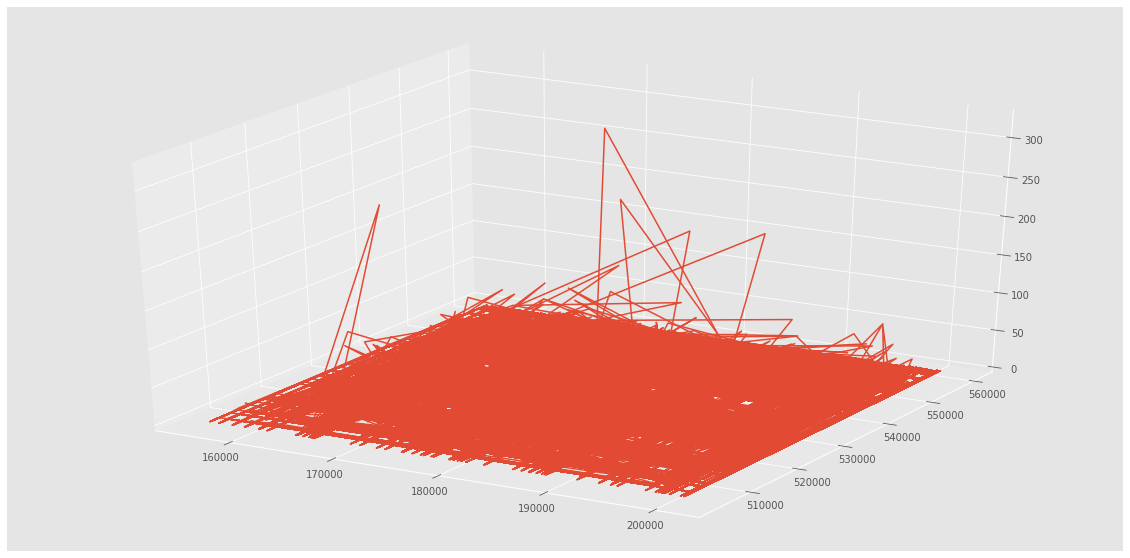

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
df_temp = df
ax = plt.axes(projection = "3d")
gridtable = pd.pivot_table(df_temp,
                           values = ["IncidentNumber"],
                           index = ["Easting_rounded"],
                           columns = ["Northing_rounded"],
                           aggfunc = "count", fill_value = 0).values
X, Y = np.meshgrid(df_temp["Northing_rounded"].unique(),
                   df_temp["Easting_rounded"].unique(),
                   sparse = True
                   )
ax.plot_wireframe(X, Y, gridtable)
plt.show()

In [ ]:
gridtable.shape

(567, 444)